# Connect drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# path of working directory
%cd /content/drive/MyDrive/NIDHI/

# check working directory.
import os
HOME = os.getcwd()
print(HOME)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/NIDHI
/content/drive/MyDrive/NIDHI


# GPU check

In [2]:
!nvidia-smi

Tue Jul 11 05:48:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
# %cd {HOME}/datasets

!pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="uu5totCuYo8KA3q9t4Sx")
# project = rf.workspace("mapua-university-n07py").project("cs-thesis-dataset-hms")
# dataset = project.version(3).download("yolov8")

mkdir: cannot create directory ‘/content/drive/MyDrive/NIDHI/datasets’: File exists


**CUSTOM TRAINING**

In [6]:
%cd {HOME}
# !yolo task=detect mode=train model=yolov8x.pt data=/content/drive/MyDrive/NIDHI/datasets/CS/data.yaml epochs=100 plots=True patience=50 batch=10

/content/drive/MyDrive/NIDHI


# crad cam,runs/detect/train12


In [7]:
!pip install ttach

In [8]:
import time
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image
import numpy as np
import sys

In [9]:
model = YOLO('/content/drive/MyDrive/NIDHI/runs/detect/train12/weights/best.pt')
target_layers = [model.model.model[-2]]
def predict_heat(source):
    try:
        img = source
        rgb_img = source.copy()
        img = np.float32(img) / 255
        cam = EigenCAM(model, target_layers, task='cls')
        grayscale_cam = cam(rgb_img)[0, :, :]
        cam_image = show_cam_on_image(img, grayscale_cam)  # , use_rgb=True)
        alpha = 0.8  # Weight for image1
        beta = 0.3  # Weight for image2
        cam_image1 = predict_pose(source)
        cam_image_f = cv2.addWeighted(cam_image1, alpha, cam_image, beta, 0)
        return cam_image_f
    except Exception as e:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
        print(exc_type, fname, exc_tb.tb_lineno)
        return source


In [10]:
def predict_pose(source):
    try:
        start_time = time.time()
        results = model(source, boxes=True, conf=0.10, iou=0.8)#, save=True)  # ,boxes=False,show=True)#,save=True)
        for result in results:
            res_plotted = result.plot(boxes=True)
        return res_plotted
    except Exception as e:
        print("LOLOL")
        print(e)
        return source


0: 640x640 (no detections), 77.4ms
Speed: 3.2ms preprocess, 77.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 77.8ms
Speed: 1.7ms preprocess, 77.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


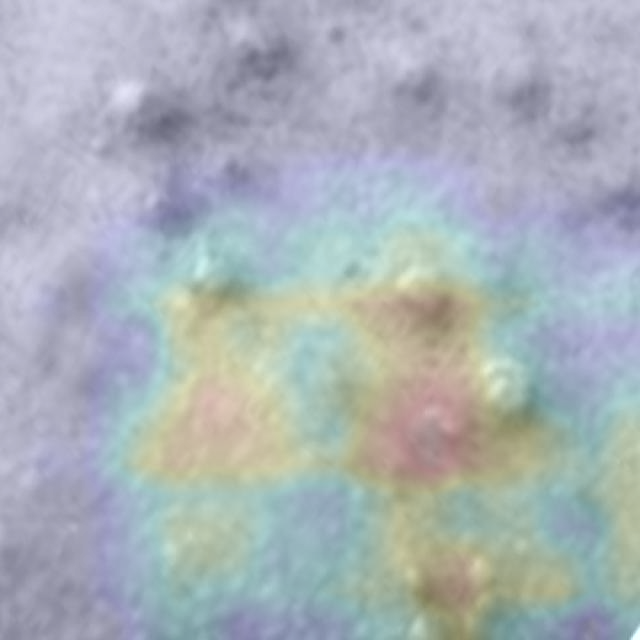

In [11]:
# import os

# dir_list = os.listdir("images")
# for fil in dir_list:
#     print(fil)
#     cv2.imwrite("result/" + fil, predict_heat(cv2.imread("images/" + fil)))
#     break
from google.colab.patches import cv2_imshow
import cv2
cv2_imshow(predict_heat(cv2.imread("/content/drive/MyDrive/NIDHI/datasets/CS/train/images/AC-1-_jpg.rf.94e967fd6709f951106f7e2b77f33ee3.jpg")))

In [15]:
from google.colab.patches import cv2_imshow
import cv2
import os
image_path = "/content/drive/MyDrive/result/"
dir_list = os.listdir(image_path)
for filename in dir_list:
    if filename.endswith('.jpg'):
        file_path = os.path.join(image_path, filename)  # Get the full file path
        os.remove(file_path)  # Delete the file
        print(f"Deleted: {filename}")

print("JPG files deletion completed.")


JPG files deletion completed.


In [16]:
from google.colab.patches import cv2_imshow
import cv2
image_path = "/content/drive/MyDrive/NIDHI/datasets/CS/valid/images/"
dir_list = os.listdir(image_path)

for fil in dir_list:
    # print(fil)
    if dir_list.index(fil):
      # print(dir_list.index(fil),fil)
      image_new = predict_heat(cv2.imread(image_path+fil))
      cv2_imshow(image_new)
      cv2.imwrite("/content/drive/MyDrive/result/detection/"+fil, image_new)
      # break


Output hidden; open in https://colab.research.google.com to view.